In [1]:
#importing all the libraries
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import io

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K 
K.clear_session()
# Check tensorflow version
if float(tf.__version__[0]) < 2.0:
  print('Updating tensorflow')
  !pip install tensorflow==2.0
else:
  print('Correct version of Tensorflow installed.')


Correct version of Tensorflow installed.


In [48]:
#importing the datasets taken from kaggle
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df_submit = pd.read_csv('./submit.csv')
df_train = df_train.fillna(' ')
df_test = df_test.fillna(' ')
#checking training dataframe
df_train.count()

id        20800
title     20800
author    20800
text      20800
label     20800
dtype: int64

In [50]:
#checking test dataframe
df_test.count()

id        5200
title     5200
author    5200
text      5200
dtype: int64

In [51]:
#Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['text'])
word_index = tokenizer.word_index
vocab_size=len(word_index)
print(vocab_size)

# Padding data

sequences = tokenizer.texts_to_sequences(df_train['text'])
padded = pad_sequences(sequences, maxlen=700, padding='post', truncating='post')


238051


In [52]:
#Splitting the data for training and testing purposes
split = 0.2
split_n = int(round(len(padded)*(1-split),0))

train_data = padded[:split_n]
train_labels = df_train['label'].values[:split_n]
test_data = padded[split_n:]
test_labels = df_train['label'].values[split_n:]

In [53]:
 #Import tensor representations for words

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;
print(len(coefs))

embeddings_matrix = np.zeros((vocab_size+1, 100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-06-03 13:30:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving web.ucsd.edu (web.ucsd.edu)... 132.239.1.231, 132.239.1.230
Connecting to web.ucsd.edu (web.ucsd.edu)|132.239.1.231|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M   101MB/s    in 3.3s    

2020-06-03 13:30:30 (101 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]

100


In [55]:
# Build the architecture of the model
     
model_f = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 100, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [57]:
model_f.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])
model_f.summary()

history = model_f.fit(train_data, train_labels, epochs=8, batch_size=100, validation_data=[test_data, test_labels])

print("Training Complete")


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         23805200  
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense_8 (Dense)              (None, None, 128)         12928     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 20)          11920     
_________________________________________________________________
lstm_5 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)               

In [61]:
model_f.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])
model_f.summary()

history = model_f.fit(train_data, train_labels, epochs=8, batch_size=100, validation_data=[test_data, test_labels])

print("Training Complete")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         23805200  
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense_8 (Dense)              (None, None, 128)         12928     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 20)          11920     
_________________________________________________________________
lstm_5 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)               

In [62]:
model_f.compile(loss='binary_crossentropy',optimizer='Adagrad',metrics=['accuracy'])
model_f.summary()

history = model_f.fit(train_data, train_labels, epochs=8, batch_size=100, validation_data=[test_data, test_labels])

print("Training Complete")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         23805200  
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense_8 (Dense)              (None, None, 128)         12928     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 20)          11920     
_________________________________________________________________
lstm_5 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)               

In [69]:
model_f.compile(loss='binary_crossentropy',optimizer='Adadelta',metrics=['accuracy'])
model_f.summary()

history = model_f.fit(train_data, train_labels, epochs=8, batch_size=100, validation_data=[test_data, test_labels])

print("Training Complete")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         23805200  
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense_8 (Dense)              (None, None, 128)         12928     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 20)          11920     
_________________________________________________________________
lstm_5 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)               

In [70]:
model_f.compile(loss='binary_crossentropy',optimizer='Nadam',metrics=['accuracy'])
model_f.summary()

history = model_f.fit(train_data, train_labels, epochs=8, batch_size=100, validation_data=[test_data, test_labels])

print("Training Complete")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         23805200  
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense_8 (Dense)              (None, None, 128)         12928     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 20)          11920     
_________________________________________________________________
lstm_5 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)               

In [71]:
model_f.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_f.summary()

history = model_f.fit(train_data, train_labels, epochs=8, batch_size=100, validation_data=[test_data, test_labels])

print("Training Complete")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         23805200  
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense_8 (Dense)              (None, None, 128)         12928     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 20)          11920     
_________________________________________________________________
lstm_5 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)               

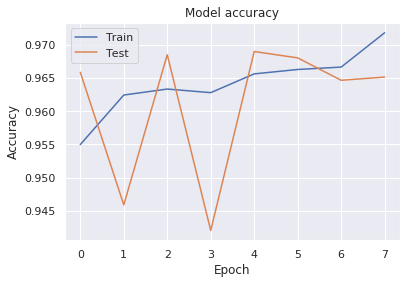

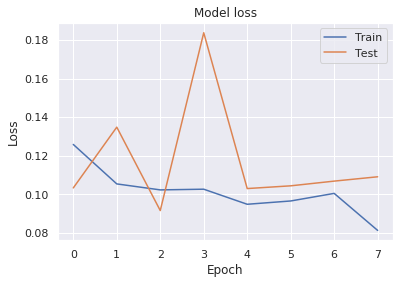

In [72]:
# Visualize the results:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [74]:
#evaluate model 
scores = model_f.evaluate(test_data, test_labels)
print()
print('ACCURACY:', scores[1])

4160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [44]:
#Tokenizing the text for test data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_test['text'])
word_index = tokenizer.word_index
vocab_size=len(word_index)
print(vocab_size)

# Padding data

sequences1 = tokenizer.texts_to_sequences(df_test['text'])
padded1 = pad_sequences(sequences1, maxlen=700, padding='post', truncating='post')

111922


In [45]:
#evaluate model 
scores = model_f.evaluate(padded1, df_submit['label'].values)
print()
print('Test accuracy:', scores[1])

5200/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [218]:
df_test.head(6)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,20805,Trump is USA's antique hero. Clinton will be n...,,Trump is USA's antique hero. Clinton will be n...


In [236]:
df_submit.head(15)

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1
5,20805,1
6,20806,1
7,20807,1
8,20808,0
9,20809,1


In [77]:
predict_news(df_test['text'][4])

{'LABEL': 'True'}

In [92]:
b = []
d=[]
for i in range(1000):
    b.append(i)
    j = random.randint(1,5199)
    
    p = predict_n(df_test['text'][j])
    d.append(p)


In [93]:
df_news = pd.DataFrame(b) 
df_news['label'] =d
df_news.columns=['x','label']
df_news['label'].astype(str)



0      Fake
1      Fake
2      Fake
3      Fake
4      Fake
       ... 
995    Fake
996    Fake
997    Fake
998    True
999    True
Name: label, Length: 1000, dtype: object

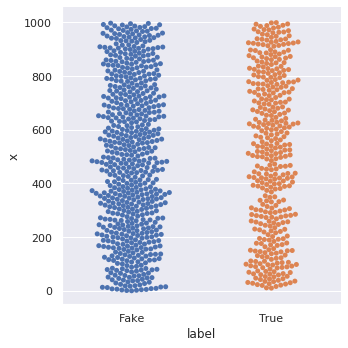

In [94]:

cmap = sns.cubehelix_palette(dark=.9, light=.3, as_cmap=True)
sns.catplot(x="label", y="x", kind="swarm",data=df_news)


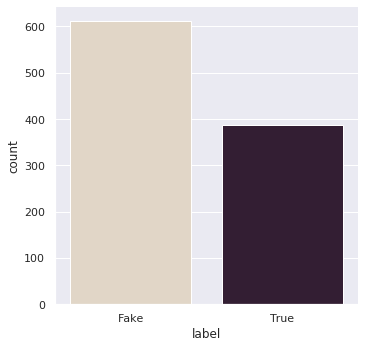

In [96]:
sns.catplot(x="label", kind="count", palette="ch:.25", data=df_news);

In [81]:
#Excerpt from a book
predict_news("“We’ve been trying to record an episode of Universe City for the past ten minutes, but all that’s happened so far is Aled and I have played a game of tag, resulting in me falling on him again (by accident this time). I spent a good few minutes pretending to be a character I made up on the spot and called ‘Toulouse’, like my Internet identity, and now all three of us are playing Never Have I Ever.")

{'LABEL': 'True'}

In [82]:
predict_news(df_test['text'][0])

{'LABEL': 'Fake'}

**. SENTIMENTAL ANALYSIS WITH THE SAME MODEL AND KAGGLE TWITTER DATA  .**

In [2]:
#Dataset number 3
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"

SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"


In [3]:
df_t = pd.read_csv("./twitter.csv", encoding =DATASET_ENCODING , names=DATASET_COLUMNS)
df_t.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [5]:
%%time
df_t.target = df_t.target.apply(lambda x: decode_sentiment(x))


CPU times: user 412 ms, sys: 22.1 ms, total: 434 ms
Wall time: 433 ms


In [6]:
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")


In [7]:
import re
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [8]:
df_t.text = df_t.text.apply(lambda x: preprocess(x))

In [9]:
df_train, df_test = train_test_split(df_t, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 1280000
TEST size: 320000


In [10]:
documents = [_text.split() for _text in df_train.text] 

In [11]:
import gensim
#THE words to vector model 
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [12]:
#running the words to vector model
w2v_model.build_vocab(documents)

In [13]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 30369


In [14]:
#using the words to vector model to run on the texts 
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(263125238, 295270528)

In [15]:
%%time
#running the word tokenizer on the text 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 290419
CPU times: user 15.3 s, sys: 208 ms, total: 15.5 s
Wall time: 15.5 s


In [16]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

CPU times: user 22.8 s, sys: 1.45 s, total: 24.2 s
Wall time: 24.2 s


In [17]:
labels = df_train.target.unique().tolist()
labels.append(NEUTRAL)
labels


['POSITIVE', 'NEGATIVE', 'NEUTRAL']

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (1280000, 1)
y_test (320000, 1)


In [19]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290419, 300)


In [20]:
# Build the architecture of the model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train,
                    batch_size=1024,
                    epochs=2,
                    validation_data=[x_test,y_test],
                    verbose=1)

print("Training Complete")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          87125700  
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
dense (Dense)                (None, 300, 128)          38528     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 75, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 75, 20)            11920     
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0

In [22]:
score = model.evaluate(x_test, y_test, batch_size=1024,verbose=1)
print()
print("ACCURACY:",score[1])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




ACCURACY: 0.7829437


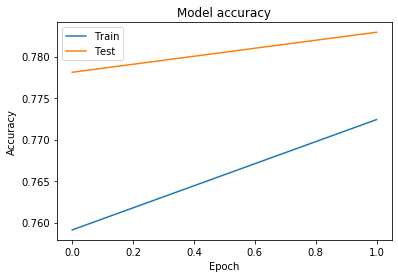

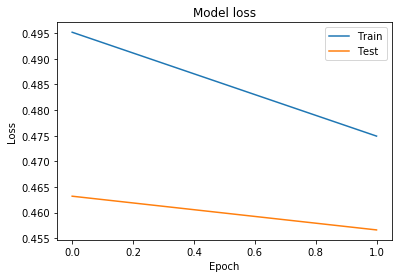

In [23]:
# Visualize the results:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [24]:
def sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        if score < 0.5:
            return NEGATIVE
        else:
            return POSITIVE

In [25]:
def predict(text, include_neutral=True):
   
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
      }  

In [26]:
def newslabel(score):
    if(score>=0.5):
        return "True"
    else:
        return "Fake"

In [27]:
def predict_news(text):
    
    #Tokenize the text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=700)
    # Predict
    score = model_f.predict([x_test])[0]
    # Decode sentiment
    label = newslabel(score)

    return {"LABEL": label,
      }  

In [31]:
df_trump = pd.read_csv("./trumptweets.csv")

In [88]:
df_trump.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [33]:
def predict_l(text, include_neutral=True):
   
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = sentiment(score, include_neutral=include_neutral)

    return  label

In [91]:
def predict_n(text):
   
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model_f.predict([x_test])[0]
    # Decode sentiment
    label = newslabel(score)
    return  label

In [97]:
import random
a = []
x=[]
for i in range(1000):
    x.append(i)
    j = random.randint(1,41121)
    #print(df_trump['content'][j])
    p = predict_l(df_trump['content'][j])
    a.append(p)
    #print(p)
    

In [98]:
y = a

In [99]:
df_testing = pd.DataFrame(x) 
df_testing['label'] =y
df_testing.columns=['x','label']
df_testing['label'].astype(str)


0       NEUTRAL
1      POSITIVE
2      NEGATIVE
3      NEGATIVE
4      POSITIVE
         ...   
995    NEGATIVE
996    NEGATIVE
997     NEUTRAL
998    NEGATIVE
999    NEGATIVE
Name: label, Length: 1000, dtype: object

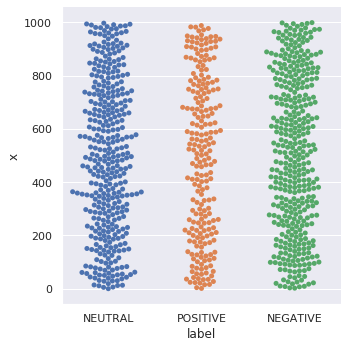

In [100]:
import seaborn as sns; sns.set()
objects=('POSITIVE','NEGATIVE','NEUTRAL')
x = np.array(x)
y = np.array(a)
cmap = sns.cubehelix_palette(dark=.9, light=.3, as_cmap=True)
sns.catplot(x="label", y="x", kind="swarm",data=df_testing)


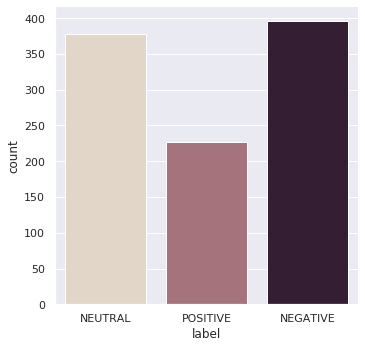

In [101]:
sns.catplot(x="label", kind="count", palette="ch:.25", data=df_testing);

In [60]:
for i in range(10):

    j = random.randint(1,41121)
    print(df_trump['content'][j])
    p = predict_l(df_trump['content'][j])

    print(p)

" @ KaelaDianne97: @ realDonaldTrump is the only man fit to run our country. What a knack for politics and business, WHAT A MAN!!" Thanks.
NEGATIVE
"@BethAndersonEsq: You make this country great & inspire younger generations to become better. You are the American story." Thank you Beth
NEGATIVE
" @ ArtPar17: @ CNN Your story is a total fraud" I agree!
NEGATIVE
....The United States looses soooo much money on Trade with Mexico under NAFTA, over 75 Billion Dollars a year (not including Drug Money which would be many times that amount), that I would consider closing the Southern Border a “profit making operation.” We build a Wall or.....
NEGATIVE
" @ VeryOddDog: @ realDonaldTrump TRUMP TRUMP - YOU ARE THE ONLY ONE AMERICA NEEDS RIGHT NOW THE ONLY ONE WHO CAN SAVE AMERCIA GOD BLESS U SIR"
NEUTRAL
57% of Americans disagree with @ BarackObama's contraception mandate on religious institutions.http://bit.ly/xGlsld He is plain wrong.
POSITIVE
In Clare, Ireland, @ Trump_Ireland’s White Horses Sp

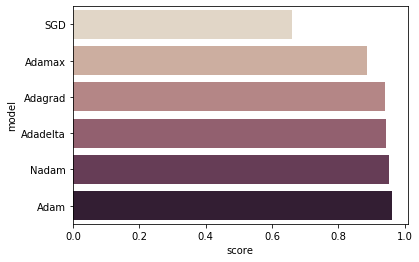

In [21]:
import seaborn as sns
import pandas as pd
cl=['SGD','Adamax','Adagrad','Adadelta','Nadam','Adam']
sc=[0.659,0.886,0.940,0.944,0.953,0.961]
df_sc=pd.DataFrame(cl)
df_sc['score']=sc
df_sc.columns=['model','score']
df_sc['model'].astype(str)

df_sc
sns.barplot(x="score",y="model" , palette="ch:.25", data=df_sc);